# Project: Investigation Of Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Project Background

This is a data analysis project that I completed for a Udacity Data Analyst Nanodegree.  In this project I analyze a movie dataset using Pandas, NumPy, Matplotlib and descriptive statistics to answer questions that I was interested in researching. Since the use of inferential statistics or machine learning was beyound the scope of this project, my conclusions should be viewed as tentative.

### Dataset Background

I downloaded the data set file (tmdb-movies.csv) from [this](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1538364550547000) Undacity Google Drive.  Undacity completed some data wrangling from the original data on [Kaggle.](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home) This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. According to the overview section on Kaggle (currated the data) it is not clear if the budgets and revenues are all in US dollars and if they consistently show the global revenues.

One other piece of advice from Kaggle is that it is probably a good idea to treat values of zero in the budget field as missing, with the caveat that missing budgets are much more likely to have been from small budget films in the first place.

### Dataset Questions

After reviewing the available fields I decided to focus on the following questions that I felt could be answered by this data set:

- What are the profit trends of movies over time?
- What are the characteristics of movies with high revenue?  


In [1]:
# Library import statements for all of the packages that I used.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Gather The Dataset

In [92]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

### Assess The Dataset

In [5]:
# this returns the first few lines in our dataframe
# by default, it returns the first five
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Observations:**
- Release_date is not is a proper datetime format.
- Some of the non numberic rows have signicant % of null values but this is not a major concern since this analysis which will focused mainly on the numberic attributes of the dataset.  The following cell provides an ordered count of the attributes with null values to clearly show which attributes have the most null values.

In [14]:
# This returns a Pandas Dataframe with the sums of logical True values (i.e. null value) for each columns 
null_count_df = df.isnull().sum().reset_index()

# Define column labels for null_count
null_count_df.columns = ['column_name', 'null_count']

# Calculate the percentage of missing values
null_count_df['null_%'] = null_count_df['null_count']/len(df)*100

# Display the columns in descending order of the percentage of missing values
null_count_df.sort_values('null_%', ascending=False).reset_index(drop=True)

,column_name,null_count,null_%
0,homepage,7930,72.979937
1,tagline,2824,25.989324
2,keywords,1493,13.740107
3,production_companies,1030,9.479109
4,cast,76,0.699429
5,director,44,0.404933
6,genres,23,0.211669
7,imdb_id,10,0.092030
8,overview,4,0.036812
9,budget_adj,0,0.000000


In [20]:
# Let do a quick spot check to confirm that the object datatypes are really strings.
print("The release_date field is of type:", type(df['release_date'][0]))

The release_date field is of type: <class 'str'>


In [8]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

**Observation:**
- I would of expected more unique values for the budget and revenue related columns - let's look into this more closely below.

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observations:**
- 50th percentile for budget and revenue releated columns is zero indicated that at least haft of rows have zeros.  Since this is likely because the data owners didn't have or want to share this information we will need to replace these zeros with NaN (Not A Number) so that these rows are ignored in subsequent analysis.  The following cells count the number of rows for budget_adj and revenue_adj that have zero as a value.

In [17]:
rows, col = df.query('budget_adj == 0').shape
print('The budget_adj attribute has {} rows with zero as the value'.format(rows))

The budget_adj attribute has 5696 rows with zero as value


In [18]:
rows, col = df.query('revenue_adj == 0').shape
print('The revenue_adj attribute has {} rows with zero as the value'.format(rows))

The revenue_adj attribute has 6016 rows with zero as the value


In [21]:
rows, col = df.query('runtime == 0').shape
print('The runtime attribute has {} rows with zero as the value'.format(rows))

The runtime attribute has 31 rows with zero as the value


In [10]:
# check for duplicates in the data
sum(df.duplicated())

1

We will drop this dup row in next section.   Note that if you look at the original_title attribute closely you will find almost 300 title dupliate but that is because older movies are remade over time so duplicate values for the title is to be expected. 

### Clean The Dataset

The following four tasks will be completed to clean the dataset
1. Columns that are not needed will be deleted
2. For budget_adj, revenue_adj, and runtime change zero values to NaN (not a number)
3. Duplicate rows will be droped
4. The release_date datatype will be changed from string to datetime

#### Delete Columns

In [3]:
# list of columns that are to be deleted/dropped
col = ['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','genres','production_companies']

# deleting the columns
df.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.head()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Replace Zeros with NaN and then drop rows with NaN

In [4]:
# Let count the number of NaN values in trim down df before we begin and then check afterwards to see the increase
x =  df.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 0


In [5]:
# replace zeros with NaN and recheck number of NaNs
df = df.replace(0, np.nan)

x =  df.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 11743


In [6]:
# check number of rows
df.shape

(10866, 8)

In [7]:
# Dropping rows with NaN values since they will not help our analysis
df.dropna(axis = 0, inplace = True)

# recheck number of rows
df.shape

(3855, 8)

#### Drop duplicate row

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# confirm correction by rechecking for duplicates in the data (output should be 0)
sum(df.duplicated())

0

#### Change release_date to datetype

In [10]:
# change and check to confirm change occurred
df['release_date'] = pd.to_datetime(df['release_date'])
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
popularity      3854 non-null float64
runtime         3854 non-null float64
release_date    3854 non-null datetime64[ns]
vote_count      3854 non-null int64
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 271.0 KB


In [34]:
# save clean df to file as backup
df.to_csv('tmdb-movies-clean.csv', index=False)

In [11]:
# quick look at updated stats for clean dataset
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What are the profit trends of movies over time?

We will start by creating a profit_loss column.

In [26]:
# Create a new column for the profit_loss value of each movie
df['profit_loss'] = df['revenue_adj'] - df['budget_adj']

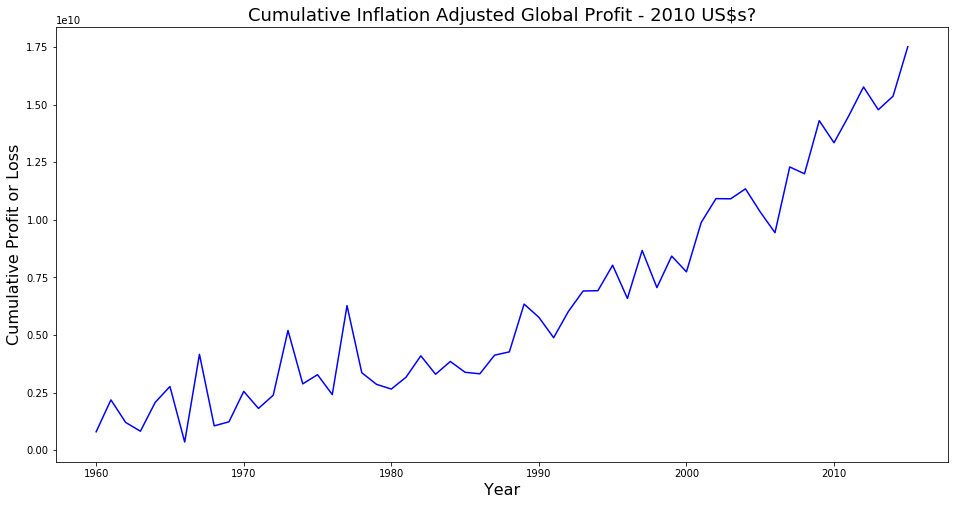

In [34]:
# Let start by looking at total yearly profit over time (assuming US $s)

df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Cumulative Inflation Adjusted Global Profit - 2010 US$s?', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Cumulative Profit or Loss', fontsize = 16);

**Observations:**
- It looks like there is about a 10x growth in profit over this duration but I'm guessing that is because more films are being made in recent years.  Let's explore that hypothesis by first looking at the distribution of the number of films that are being made over time.

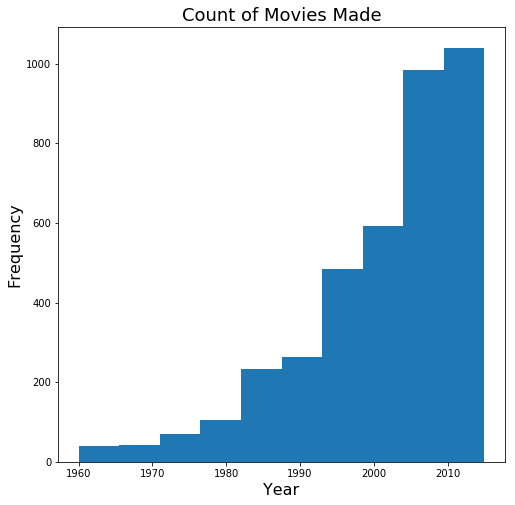

In [37]:
df['release_year'].plot(kind='hist', figsize = (8,8));
plt.title('Count of Movies Made', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

The above distribution is clearly skewed to the left which support the above hypothesis that the increase is largely due to an increase in film production. Let us look at the profit_loss each year divided by the number of films to normalize the yearly profit_loss attribute.

In [38]:
# create a count of the number of movies made each year
movie_count_yr = df.groupby('release_year').count()['release_date']

# calculate a propostion object of yearly profit_loss per movie
profit_per_movie = df.groupby('release_year')['profit_loss'].sum() / movie_count_yr


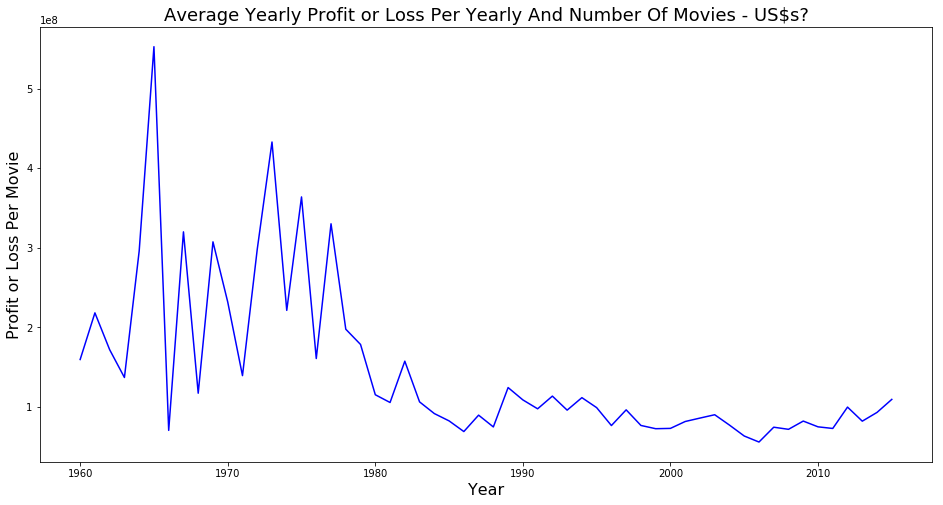

In [140]:
profit_per_movie.plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Average Yearly Profit or Loss Per Yearly And Number Of Movies - US$s?', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit or Loss Per Movie', fontsize = 16);

The above visual indicates that if you look at the average yearly per movie profit or loss, the trend is actually relatively flat over the last 2 decades.  

### Research Question 2: What are the characteristics of movies with high inflation adjusted revenue?

In [122]:
# load clean dataset and look at a few rows
df = pd.read_csv('tmdb-movies-clean.csv')
df.head()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120.0,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119.0,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137.0,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [123]:
# spot check the shape
df.shape

(3854, 8)

Let us start by looking at the distribution of revenue_adj

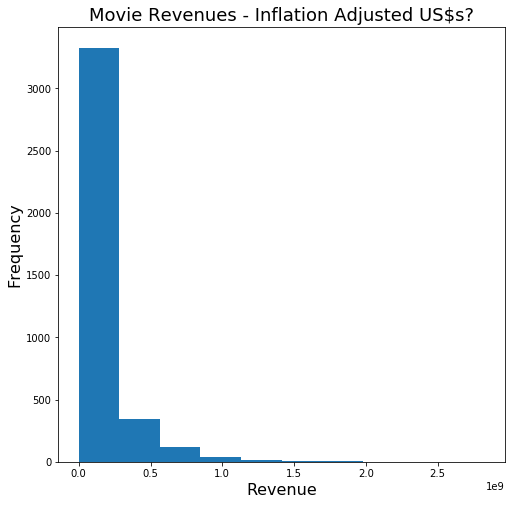

In [124]:
df['revenue_adj'].plot(kind='hist',figsize=(8,8));
plt.title('Movie Revenues - Inflation Adjusted US$s?', fontsize = 18)
plt.xlabel('Revenue', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

The above visual shows that the distribution is skewed right.

Let's also looks at some basic stats for this revenue_adj attribute mainly to find the median which will be used later in this analysis to segment revenue into high and low buckets.  Since the distribution is not normal the median is a better segment cutoff point then the mean.  

In [125]:
df['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

Now we will continue to explore the revenue_adj attribute by looking at how it is correlated to other numeric attributes. 

In [126]:
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
runtime,0.215092,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.780096,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,0.317866,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.173278,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,0.399356,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,0.546959,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


**Observations for revenue_adj:**
    - There is strong positive correlation with vote_count
    - There is a moderate to strong positive correlation with budget_adj and popularity
    - There is weak correlation with runtime and vote_average
    - There is no to very weak negative correlation with release_year
 
 Since the correlation with release_year is very week we will drop this attribute from consideration.
    

In [120]:
#make copy of df
df_q2 = df

In [121]:
# Drop release_year 
df_q2.drop(['release_year'], axis=1, inplace = True)

In [102]:
# Also drop release date since we will be comparing the mean of the attributes in the low and high revenue_adj buckets.
df_q2.drop(['release_date'], axis=1, inplace = True)
df_q2.head()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,124.0,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,120.0,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,119.0,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,136.0,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,137.0,2947,7.3,1.747999e+08,1.385749e+09


Lets look at some scatter plots to get a visual sense of the correlation.

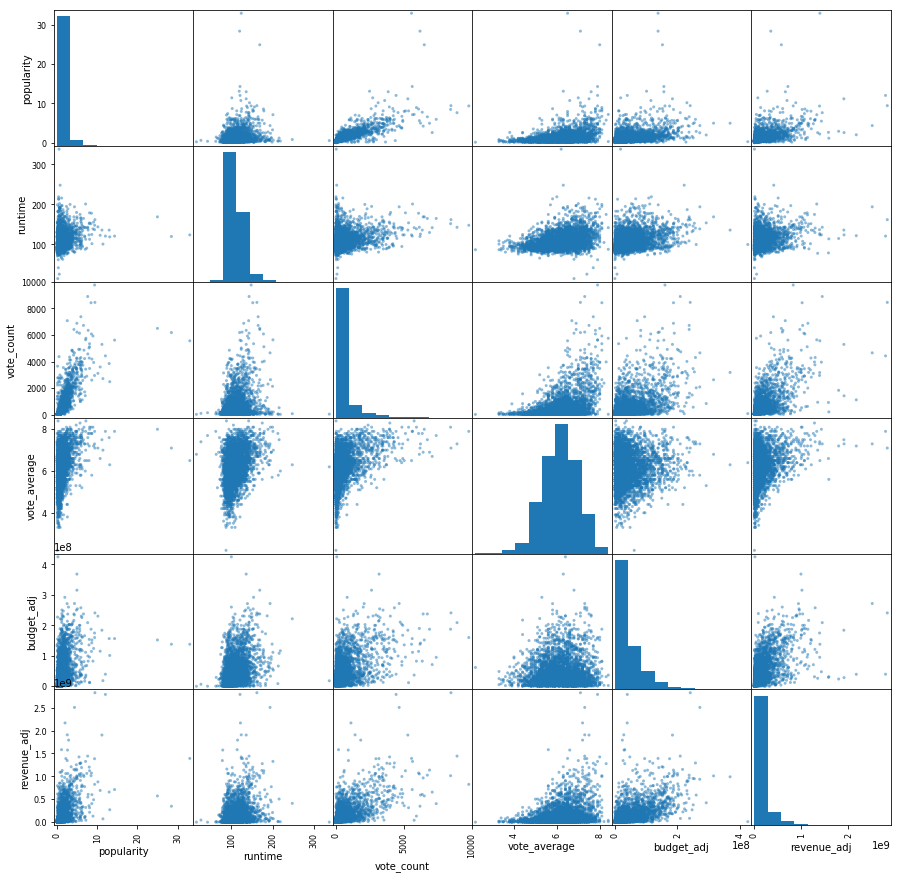

In [103]:
pd.plotting.scatter_matrix(df_q2, figsize = (15,15));

In looking up the above revenue_adj column of scatter plots, it looks like segmenting revenue_adj into low and high buckets might be useful to answer this research question.  

In [128]:
# Segment revenue_adj into low and high buckets based on mediam of 6.173068e+07 since distribution is not normal
df_q2_low = df_q2[df_q2['revenue_adj'] <= 6.173068e+07]
df_q2_high = df_q2[df_q2['revenue_adj'] > 6.173068e+07]

In [106]:
# drop revenue_adj from both low and high dataframes
low_rev = df_q2_low.drop('revenue_adj', axis=1)
high_rev = df_q2_high.drop('revenue_adj', axis=1)
high_rev.head()

,popularity,runtime,vote_count,vote_average,budget_adj
0,32.985763,124.0,5562,6.5,1.379999e+08
1,28.419936,120.0,6185,7.1,1.379999e+08
2,13.112507,119.0,2480,6.3,1.012000e+08
3,11.173104,136.0,5292,7.5,1.839999e+08
4,9.335014,137.0,2947,7.3,1.747999e+08


In [130]:
# look and low_rev stats
low_rev.describe()

,popularity,runtime,vote_count,vote_average,budget_adj
count,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03
mean,0.683875,104.809030,186.128697,6.012299,2.272767e+07
std,0.592679,17.597551,308.159704,0.816782,2.384708e+07
min,0.001117,15.000000,10.000000,2.200000,9.693980e-01
25%,0.331861,93.000000,36.000000,5.500000,7.000000e+06
50%,0.538043,102.000000,86.000000,6.100000,1.638058e+07
75%,0.848174,113.000000,205.500000,6.600000,3.126945e+07
max,7.192039,338.000000,5754.000000,8.400000,4.250000e+08


In [131]:
#look at high_rev stats
high_rev.describe()

,popularity,runtime,vote_count,vote_average,budget_adj
count,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03
mean,1.699233,113.631552,869.311884,6.324027,6.575232e+07
std,1.867170,21.105240,1104.806249,0.740526,5.022008e+07
min,0.010335,69.000000,10.000000,3.400000,2.248029e+02
25%,0.767232,98.000000,201.500000,5.800000,2.876157e+07
50%,1.207245,110.000000,466.000000,6.300000,5.195004e+07
75%,1.974988,125.000000,1056.000000,6.900000,9.029490e+07
max,32.985763,248.000000,9767.000000,8.300000,3.683713e+08


Now we will calculate and visualize the percentange change (increase) in the mean of each attribute between the low and high revenue groups.

In [134]:
# We will plot the percent increase (change) in means of these attributes between low and high buckets to see
# if anything interesting can be observed

# create a list of features (i.e., the above columns or attributes)
features = low_rev.columns

# create a dataframe to store feature names and mean difference
diff = pd.DataFrame()
diff['Features'] = features

In [135]:
# Create a difference column of the percent increase of the mean for each feature between the high and low buckets
diff['Difference'] = [((high_rev[f].mean() - low_rev[f].mean())/low_rev[f].mean() * 100) for f in features]
diff.head()

,Features,Difference
0,popularity,148.471129
1,runtime,8.417712
2,vote_count,367.048819
3,vote_average,5.184840
4,budget_adj,189.305145


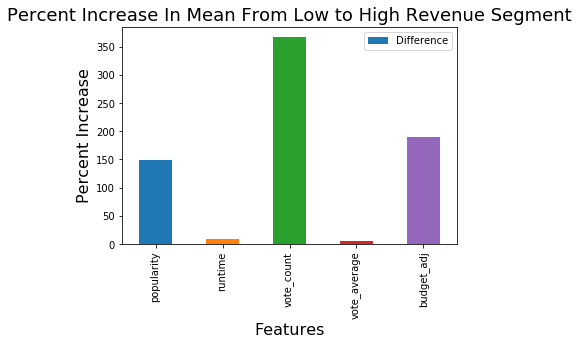

In [138]:
# plot the perdifferences in feature means
diff.plot(x='Features',y='Difference',kind='bar')
plt.title('Percent Increase In Mean From Low to High Revenue Segment', fontsize = 18)
plt.xlabel('Features', fontsize = 16)
plt.ylabel('Percent Increase', fontsize = 16);

**Observations:**
- There is roughly a 350% increase the vote_count attribute for the high revenue bucket confirming that high vote count is a key attribute of the high revenue bucket
- Along the same lines one can expect higher popularity and buget to be associated with the high revenue bucket movies.

<a id='conclusions'></a>
## Conclusions

### Research Question 1: What are the profit trends of movies over time?
- The average profit per movie trend has been relatively flat over the last two decades. 

### Research Question 2: What are the characteristics of movies with high inflation adjusted revenue?

- High revenue movies will on average have significantly high votes, popularity, and budgets then low revenue movies.
- A high vote count is probably the most important attribrite associated with a high revenue movies.
- High popularity and a large budget are also key attributes of movies with high revenues. 

### Limitations And Notes On This Analysis
- Since the use of inferential statistics or machine learning was beyound the scope of this project, the conclusions should be viewed as tentative.
- According to the overview section on Kaggle (currated data) it is not clear if the budgets and revenues all are in US dollars and if they consistently show the global revenues.
- A significant percentage of movies with zero value for budget_adj or revenue_adj where trimmed from the datset. If it turned out that the lack of budget or revenue was not random it could materially impact the results.    

